In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-in-science-ii-2024/sampleSubmission.csv
/kaggle/input/machine-learning-in-science-ii-2024/training_norm.csv
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/9273.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/9292.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/11396.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/4353.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/7968.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/6490.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/5511.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/6262.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/2664.png
/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data

In [2]:
from pathlib import Path

path_training = Path('/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/')

path_training.is_dir()

True

In [3]:
path_testing = Path('/kaggle/input/machine-learning-in-science-ii-2024/test_data/test_data/')

path_testing.is_dir()

True

In [4]:
import os

for dirpath, dirnames, filenames in os.walk(path_testing):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 1020 images in '/kaggle/input/machine-learning-in-science-ii-2024/test_data/test_data'.


In [5]:
import os

for dirpath, dirnames, filenames in os.walk(path_training):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 13798 images in '/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data'.


Random image path: /kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/328.png
Image class: training_data
Image height: 240
Image width: 320


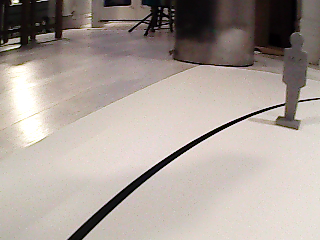

In [6]:
import random
from PIL import Image

random.seed(42) 

image_path_list = list(path_training.glob("*.png"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

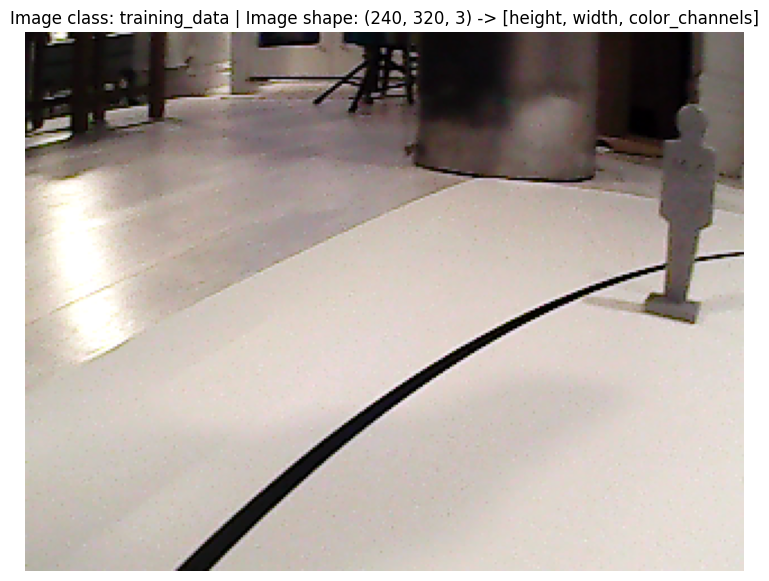

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [8]:
image_path_list = list(path_training.glob("*.png"))

error_images = []

for image_path in image_path_list:
    try:
        img = Image.open(image_path)
    except Image.UnidentifiedImageError:
        print(f"Error in {image_path}")
        error_images.append(image_path)
    #img = Image.open(image_path)
    #img_as_array = np.asarray(img)
    #if shape_img != img_as_array.shape:
        #print(img_as_array.shape)
        #shape_img = img_as_array.shape


#for n in range(10):
    #image_path_list = list(path_training.glob("*.png"))
    #print(image_path_list)
    #random_image_path = random.choice(image_path_list)
    #image_class = random_image_path.parent.stem
    #img = Image.open(random_image_path)
    #img_as_array = np.asarray(img)
    #if shape_img != img_as_array.shape:
    #    print(img_as_array.shape)
    

Error in /kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/10171.png
Error in /kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/3141.png
Error in /kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/3999.png
Error in /kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/4895.png
Error in /kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/8285.png


In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
import torchvision
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [11]:
#data_transforms = transforms.Compose([
    #transforms.Resize((224,224)),
    #transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], 
     #                    std=[0.229, 0.224, 0.225]) 
#])

data_transforms = weights.transforms()
data_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

#weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
#model_0 = torchvision.models.resnet50(weights=weights).to(device)
model_0 = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 96.4MB/s]


In [13]:
import pandas as pd

training_norm = pd.read_csv("/kaggle/input/machine-learning-in-science-ii-2024/training_norm.csv")
training_norm.head()

,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


In [14]:
training_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13793 entries, 0 to 13792
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  13793 non-null  int64  
 1   angle     13793 non-null  float64
 2   speed     13793 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 323.4 KB


In [15]:
rslt_df = training_norm[training_norm['image_id'] == 8285]
rslt_df

,image_id,angle,speed


In [16]:
image_path_list = list(path_training.glob("*.png"))
for image in error_images:
    image_path_list.remove(image)

In [17]:
len(image_path_list)

13793

In [18]:
ids = training_norm['image_id']
path_image = []
for i in ids:
    path = f'/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/{i}.png'
    path_image.append(path)
training_norm['path_image'] = path_image

In [19]:
training_norm.head()

,image_id,angle,speed,path_image
0,1,0.4375,0.0,/kaggle/input/machine-learning-in-science-ii-2...
1,2,0.8125,1.0,/kaggle/input/machine-learning-in-science-ii-2...
2,3,0.4375,1.0,/kaggle/input/machine-learning-in-science-ii-2...
3,4,0.6250,1.0,/kaggle/input/machine-learning-in-science-ii-2...
4,5,0.5000,0.0,/kaggle/input/machine-learning-in-science-ii-2...


In [20]:
from torch.utils.data import Dataset
from torchvision.io import read_image

class ImageDataset(Dataset):
    def __init__(self, ids, targets, img_dir, transform=None):
        self.ids = ids
        self.img_dir = img_dir
        self.targets = targets
        self.transform = transform
        
    
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.ids.iloc[idx])+".png")
        #img_path = os.path.join(self.img_dir, self.labels[idx])
        image = Image.open(img_path)
        img_as_array = np.asarray(image)
        shape = img_as_array.shape
        if shape[2] == 4:
            image = Image.fromarray(img_as_array[...,:3])
        target = self.targets[idx]
        if self.transform:
            image = self.transform(image)
        
        return image ,target
    

In [21]:
training_norm_no_image_id = training_norm.drop(['image_id','path_image'], axis=1)  
y = training_norm_no_image_id

In [22]:
y = y.to_numpy()

In [23]:
y

array([[0.4375, 0.    ],
       [0.8125, 1.    ],
       [0.4375, 1.    ],
       ...,
       [0.5625, 0.    ],
       [0.625 , 0.    ],
       [0.6875, 1.    ]])

In [24]:
training_data = ImageDataset(ids, y,'/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data/',data_transforms)

In [25]:
print(training_data)

In [26]:
img, target = training_data[0][0], training_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image target : {target}")
print(f"target datatype: {target.astype}")

Image tensor:
tensor([[[-1.9980, -2.0152, -2.0665,  ..., -1.7583, -1.7754, -1.7754],
         [-1.9980, -2.0152, -2.0323,  ..., -1.7754, -1.7754, -1.7583],
         [-1.9980, -2.0494, -2.0665,  ..., -1.8097, -1.8268, -1.8097],
         ...,
         [ 1.9578,  1.9064,  1.7865,  ...,  1.9578,  1.9407,  1.9407],
         [ 1.9235,  1.9064,  1.8550,  ...,  1.9578,  1.9407,  1.9407],
         [ 1.9064,  1.9064,  1.9064,  ...,  1.9578,  1.9749,  1.9235]],

        [[-1.8957, -1.9307, -1.9482,  ..., -1.6856, -1.7031, -1.7031],
         [-1.9132, -1.9307, -1.9482,  ..., -1.7031, -1.7031, -1.7206],
         [-1.9132, -1.9657, -1.9832,  ..., -1.7556, -1.7556, -1.7731],
         ...,
         [ 2.0784,  2.0784,  2.1310,  ...,  2.0784,  2.0609,  2.0609],
         [ 2.0959,  2.0959,  2.0959,  ...,  2.0784,  2.0609,  2.0609],
         [ 2.0784,  2.0784,  2.0784,  ...,  2.0784,  2.0609,  2.0784]],

        [[-1.6999, -1.7173, -1.7173,  ..., -1.3687, -1.3861, -1.3861],
         [-1.6824, -1.6999, -1.

In [27]:
len(training_data)

13793

In [28]:
random_seed= 42
validation_split = .2
dataset_size = len(training_data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

In [29]:
split

2758

In [30]:
np.random.seed(random_seed)
np.random.shuffle(indices)

In [31]:
train_indices, val_indices = indices[split:], indices[:split]

In [32]:
from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [33]:
#def collate_fn(batch):
    #batch = list(filter(lambda x: x is not None, batch))
    #return torch.utils.data.dataloader.default_collate(batch)

In [34]:
batch_size = 64 #how many samples per batch?
num_workes = os.cpu_count() # how many subprocesses to use for data loading?
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, 
                                           sampler=train_sampler,num_workers=num_workes)
validation_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size,
                                                sampler=valid_sampler,num_workers=num_workes)

In [35]:
#sample = next(iter(train_loader_angle))
#print(sample['image'].shape)

In [36]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, 
        input_size=[64, 3, 224, 224],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]) # do a test pass through of an example input size

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [64, 3, 224, 224]    [64, 1000]           --                   True
├─Sequential (features)                                      [64, 3, 224, 224]    [64, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [64, 3, 224, 224]    [64, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [64, 3, 224, 224]    [64, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [64, 32, 112, 112]   [64, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [64, 32, 112, 112]   [64, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [64, 32, 112, 112]   [64, 16, 112

In [37]:
for param in model_0.features.parameters():
    param.requires_grad = False

In [38]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = 2

# Recreate the classifier layer and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [39]:
summary(model_0, 
        input_size=[64, 3, 224, 224],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [64, 3, 224, 224]    [64, 2]              --                   Partial
├─Sequential (features)                                      [64, 3, 224, 224]    [64, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [64, 3, 224, 224]    [64, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [64, 3, 224, 224]    [64, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [64, 32, 112, 112]   [64, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [64, 32, 112, 112]   [64, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [64, 32, 112, 112]   [64, 

In [40]:
from torch import nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss() # mean square error
optimizer = optim.Adam(model_0.parameters(), lr=0.0001)

In [41]:
img_batch, label_batch = next(iter(train_loader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
print(f"Output logits:\n{pred}\n")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.2113, -0.3713]], device='cuda:0')



In [42]:
import copy
from tqdm.auto import tqdm

torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Hold the best model
best_mse = np.inf
best_weights = None
history = []

NUM_EPOCHS = 20


for epoch in tqdm(range(NUM_EPOCHS)):
    model_0.train()
    
    for batch_train, (X_train, y_train) in enumerate(train_loader):
        X_train, y_train = X_train.to(device), y_train.to(device)
        #print(X_train.shape)
        # forward pass
        y_pred_train = model_0(X_train)
        loss = loss_fn(y_pred_train.float(), y_train.float())
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # Optimizer step
        optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        for batch_test, (X_test, y_test) in enumerate(validation_loader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            #Forward pass
            y_pred_test = model_0(X_test)
            mse = loss_fn(y_pred_test.float(), y_test.float())
            mse = float(mse)
            #print(f"MSE: {mse}")
            #history.append(mse)
            if mse < best_mse:
                #history.append(mse)
                best_mse = mse
                best_weights = copy.deepcopy(model_0.state_dict())
        
        history.append(best_mse)
    
    print(f"EPOCH: {epoch}, BEST_MSE: {best_mse}")

model_0.load_state_dict(best_weights)



  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH: 0, BEST_MSE: 0.08872488141059875
EPOCH: 1, BEST_MSE: 0.0644085705280304
EPOCH: 2, BEST_MSE: 0.0615624263882637
EPOCH: 3, BEST_MSE: 0.03494285047054291
EPOCH: 4, BEST_MSE: 0.03494285047054291
EPOCH: 5, BEST_MSE: 0.03494285047054291
EPOCH: 6, BEST_MSE: 0.03494285047054291
EPOCH: 7, BEST_MSE: 0.022293206304311752
EPOCH: 8, BEST_MSE: 0.022293206304311752
EPOCH: 9, BEST_MSE: 0.01519080251455307
EPOCH: 10, BEST_MSE: 0.013207989744842052
EPOCH: 11, BEST_MSE: 0.013207989744842052
EPOCH: 12, BEST_MSE: 0.011358574032783508
EPOCH: 13, BEST_MSE: 0.010232765227556229
EPOCH: 14, BEST_MSE: 0.010232765227556229
EPOCH: 15, BEST_MSE: 0.010232765227556229
EPOCH: 16, BEST_MSE: 0.010232765227556229
EPOCH: 17, BEST_MSE: 0.010232765227556229
EPOCH: 18, BEST_MSE: 0.010232765227556229
EPOCH: 19, BEST_MSE: 0.010232765227556229


<All keys matched successfully>

In [43]:
print("MSE: %.2f" % best_mse)

MSE: 0.01


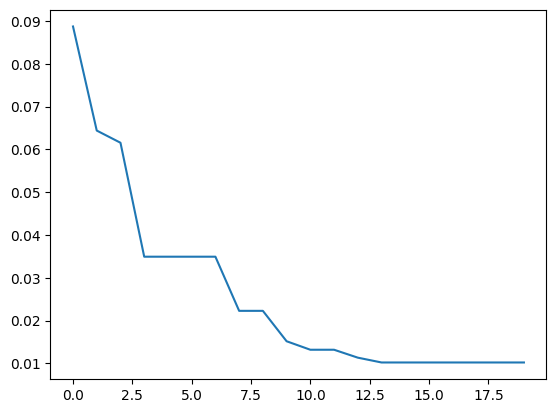

In [44]:
plt.plot(history)
plt.show()

In [45]:
test_image_path_list = list(path_testing.glob("*.png"))

error_testing_images = []

for image_path in test_image_path_list:
    try:
        img = Image.open(image_path)
    except Image.UnidentifiedImageError:
        print(f"Error in {image_path}")
        error_testing_images.append(image_path)

In [46]:
len(test_image_path_list)

1020

In [47]:
class ImageSubmissionDataset(Dataset):
    def __init__(self, ids, img_dir, transform=None):
        self.ids = ids
        self.img_dir = img_dir
        self.transform = transform
        
    
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.ids.iloc[idx])+".png")
        #img_path = os.path.join(self.img_dir, self.labels[idx])
        image = Image.open(img_path)
        img_as_array = np.asarray(image)
        shape = img_as_array.shape
        if shape[2] == 4:
            image = Image.fromarray(img_as_array[...,:3])
        if self.transform:
            image = self.transform(image)
        
        return image

In [48]:
submission_norm = pd.read_csv("/kaggle/input/machine-learning-in-science-ii-2024/sampleSubmission.csv")
submission_norm

,image_id,angle,speed
0,1,0.8125,1
1,2,0.0000,0
2,3,0.0000,0
3,4,1.0000,0
4,5,0.5625,0
...,...,...,...
1015,1016,0.9375,1
1016,1017,0.0000,1
1017,1018,0.3750,0
1018,1019,0.4375,0


In [49]:
ids = submission_norm['image_id']

In [50]:
len(ids)

1020

In [51]:
submission_data = ImageSubmissionDataset(ids,'/kaggle/input/machine-learning-in-science-ii-2024/test_data/test_data/',data_transforms)

In [52]:
img = submission_data[1019][0]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")

Image tensor:
tensor([[-1.9638, -1.9467, -1.9124,  ..., -1.9980, -2.0665, -2.1008],
        [-1.9467, -1.9295, -1.9124,  ..., -2.0152, -2.0837, -2.0837],
        [-1.9467, -1.9295, -1.9124,  ..., -1.9980, -2.0665, -2.1008],
        ...,
        [ 1.4098,  1.4098,  1.5810,  ...,  1.4098,  1.3927,  1.3413],
        [ 1.4098,  1.4783,  1.5639,  ...,  1.4440,  1.4269,  1.3755],
        [ 1.4440,  1.4612,  1.5810,  ...,  1.4098,  1.4269,  1.4269]])
Image shape: torch.Size([224, 224])
Image datatype: torch.float32


In [53]:
len(submission_data)

1020

In [54]:
batch_size = 1 #how many samples per batch?
num_workes = os.cpu_count() # how many subprocesses to use for data loading?
submission_loader = torch.utils.data.DataLoader(submission_data, batch_size=batch_size, num_workers=num_workes)

In [55]:
len(submission_loader)

1020

In [56]:
img_batch = next(iter(submission_loader))

img_single = img_batch[0].unsqueeze(dim=0)
print(f"Single image shape: {img_single.shape}\n")
img_single


Single image shape: torch.Size([1, 3, 224, 224])



tensor([[[[ 0.6906,  0.7248,  0.9474,  ..., -0.2171, -0.2171, -0.1657],
          [ 0.8618,  0.8618,  1.0159,  ..., -0.1314, -0.1314, -0.1657],
          [ 0.8104,  0.8961,  0.9988,  ..., -0.1143, -0.1314, -0.1657],
          ...,
          [ 1.5125,  1.4954,  1.4612,  ...,  1.8208,  1.8208,  1.7180],
          [ 1.4783,  1.5639,  1.5468,  ...,  1.6838,  1.6667,  1.7009],
          [ 1.4269,  1.4440,  1.4612,  ...,  1.7523,  1.6324,  1.6838]],

         [[ 0.9930,  1.0280,  1.2906,  ..., -0.1625, -0.1275, -0.1450],
          [ 0.9405,  1.0105,  1.2731,  ..., -0.2150, -0.1975, -0.1800],
          [ 1.0105,  1.1155,  1.2906,  ..., -0.1975, -0.1975, -0.1975],
          ...,
          [ 1.3957,  1.4132,  1.4482,  ...,  1.7458,  1.6758,  1.7283],
          [ 1.4307,  1.4482,  1.2906,  ...,  1.7458,  1.7458,  1.7808],
          [ 1.4482,  1.4657,  1.4657,  ...,  1.7983,  1.6408,  1.7283]],

         [[ 1.7860,  1.8208,  2.0648,  ...,  0.1999,  0.2348,  0.1825],
          [ 1.7337,  1.8034,  

In [57]:
submission_results_angle = []
submission_results_speed = []
model_0.eval()

with torch.inference_mode():
    for batch_test, (X_submission) in enumerate(submission_loader):
        X_submission = X_submission.to(device)

        #Forward pass
        y_pred_submission = model_0(X_submission)
        submission_results_angle.append(y_pred_submission[0][0])
        submission_results_speed.append(y_pred_submission[0][1])

In [58]:
for i in range(len(submission_results_angle)):
    submission_results_angle[i] = submission_results_angle[i].to("cpu").numpy()

In [59]:
for i in range(len(submission_results_speed)):
    submission_results_speed[i] = submission_results_speed[i].to("cpu").numpy()

In [60]:
#put the submission predictions alongside their associated Ids
submission_results = pd.DataFrame()
submission_results['image_id'] = submission_norm['image_id']
submission_results['angle'] = submission_results_angle
submission_results['speed'] = submission_results_speed

In [61]:
submission_results.head()

,image_id,angle,speed
0,1,0.50592417,-0.043532565
1,2,0.81271976,0.89914775
2,3,0.46250108,1.0265156
3,4,0.32072565,0.8615891
4,5,0.38375264,0.7140572


In [62]:
submission_results.to_csv('/kaggle/working/submission.csv',index=False)